# Profitable App Profiles for the App Store and Google Play Markets

## [Solution Notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb)

Our aim in this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. We're working as data analysts for a company that builds Android and iOS mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

## Opening and Exploring the Data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_statista.png) Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

* [A data](https://www.kaggle.com/lava18/google-play-store-apps) set containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).

* [A data](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) set containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from [this link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

Let's start by opening the two data sets and then continue with exploring the data.

In [1]:
from csv import reader

### The Google Play data set ###
opened_file = open('googleplaystore.csv', encoding='utf-8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set ###
opened_file = open('AppleStore.csv', encoding='utf-8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

To make it easier to explore the two data sets, we'll first write a function named **explore_data()** that we can use repeatedly to explore rows in a more readable way. 

We'll also add an option for our function to show the number of rows and columns for any data set.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))


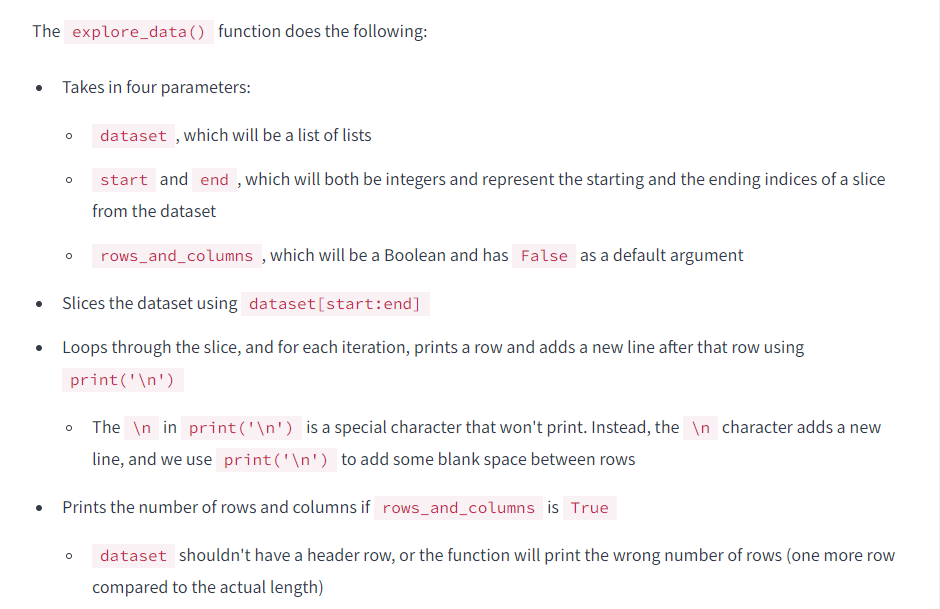

**1. Let's take a look at the Google Play Store data set.**

In [3]:
# Google Play Store Data
print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


We see that the Google Play data set has 10841 apps and 13 columns. At a quick glance, the columns that might be useful for the purpose of our analysis are **'App'**, **'Category'**, **'Reviews'**, **'Installs'**, **'Type'**, **'Price'**, and **'Genres'**.

**2. Now let's take a look at the App Store data set.**

In [4]:
# APPLE STORE DATA
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


---

We have 7197 iOS apps in this data set, and the columns that seem interesting are: **'track_name'**, **'currency'**, **'price'**, **'rating_count_tot'**, **'rating_count_ver'**, and **'prime_genre'**. 

Not all column names are self-explanatory in this case, but details about each column can be found in the data set [documentation](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## Deleting Wrong Data

In the previous step, we opened the two data sets and explored the data. 

Before beginning our analysis, we need to make sure the data we analyze is accurate, or the results of our analysis will be wrong. 

This means that we need to do the following:

* Detect inaccurate data, and correct or remove it.

* Detect duplicate data, and remove the duplicates.

Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. 

This means that we'll need to do the following:

* Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
* Remove apps that aren't free.

We call this process of preparing our data for analysis **data cleaning**. 

We do data cleaning before the analysis; it includes removing or correcting wrong data, removing duplicate data, and modifying the data to fit the purpose of our analysis.

*It's often said that data scientists spend around **80% of their time cleaning data**, and only about **20% actually analyzing (cleaned) data**.*

*In this project, we'll see that this is not far from the truth.*

---

**Let's begin by detecting and deleting wrong data.**

For this guided project, we'll guide you through the entire data cleaning process. 
In later courses, we'll learn more about data cleaning, and you'll be able to perform data cleaning without any guidance.

If you get stuck during the following exercise, you can check the [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb).

---

The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) outlines an error for row 10472. 

**Let's print this row and compare it against the header and another row that is correct.**

In [5]:
print(android[10472])  # incorrect row
print('\n')
print(android_header)  # header
print('\n')
print(android[0])      # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The row **10472** corresponds to the app *Life Made WI-Fi Touchscreen Photo Frame*, and we can see that the rating is **19**. 

This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the [discussions section](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), this problem is caused by a missing value in the **'Category'** column). 

As a consequence, we'll delete this row.

In [6]:
print(len(android))
del android[10472]  # don't run this more than once
print(len(android))

10841
10840


## Removing Duplicate Entries : Part One

In the previous step, we started the data cleaning process and deleted a row with incorrect data from the Google Play dataset. 

If you explore the Google Play data set long enough or look at the [discussions section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), you'll notice some apps have duplicate entries. 

For instance, **Instagram** has four entries:

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


***In total, there are 1,181 cases where an app occurs more than once:***

In [8]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


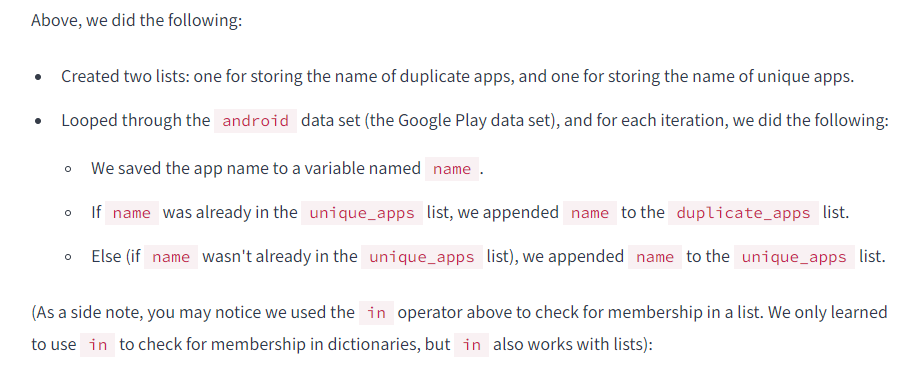

## Remove Duplicate Entries : Part Two

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. 

One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed for the **Instagram** app, the main difference happens on the **fourth position** of each row, which corresponds to the number of reviews. The different numbers show the data was collected at different times.

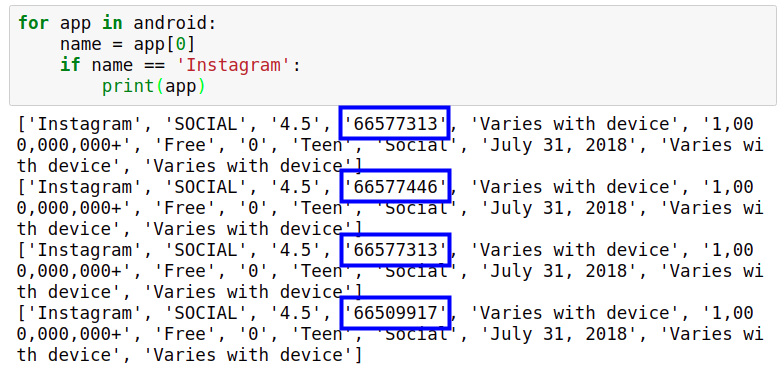

We can use this information to build a criterion for removing the duplicates. 

The higher the number of reviews, the more recent the data should be. 

Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews because the higher the number of reviews, the more reliable the ratings and remove the other entries for any given app.

**NOTE:** *There are **1,181** duplicates and after we remove the duplicates, we should be left with **9,659** rows.*

**To remove the duplicates, we will do the following:**

* Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.


* Use the information stored in the dictionary and create a new dataset, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

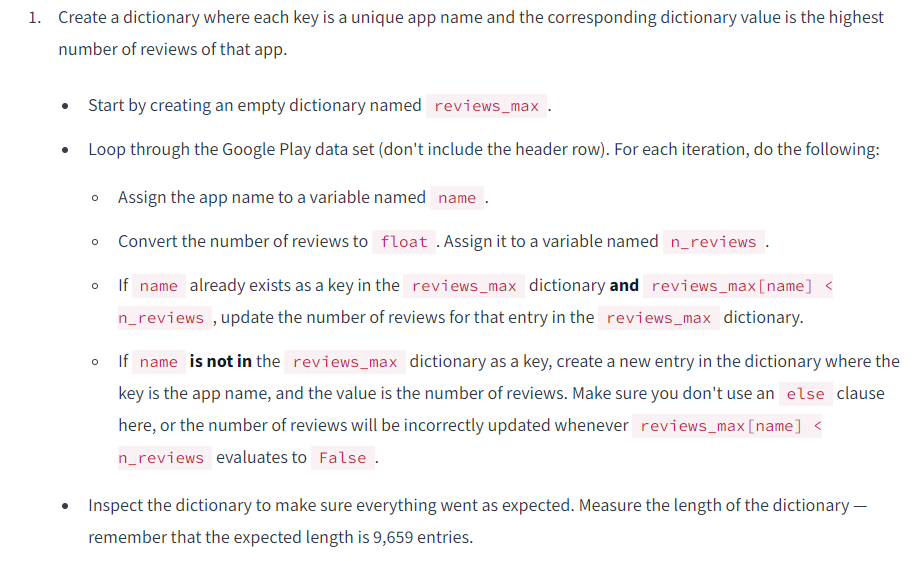

In [9]:
# STEP 1:
# Create a dictionary where each key is a unique app name and, 
# the corresponding dictionary value is the highest number of reviews of that app.

reviews_max = {}
for row in android: 
    name = row[0]
    n_reviews = float(row[3])
    if (name in reviews_max) and (reviews_max[name] < n_reviews):
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
# NOTE: There are 1,181 duplicates and after we remove the duplicates, we should be left with 9,659 rows.
# Verify that there should be 9,659 unique app names

print(len(reviews_max))

9659


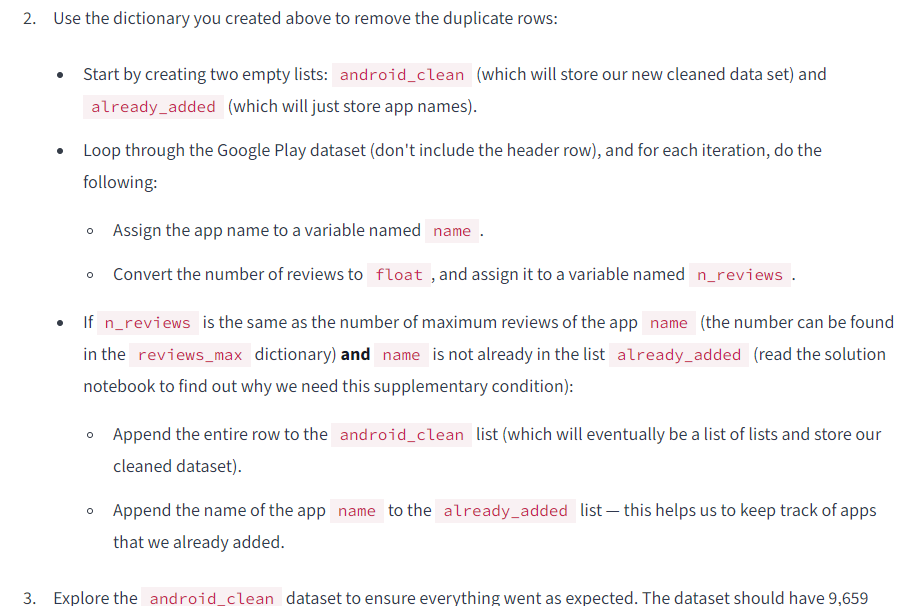

In [10]:
# STEP 2:
# Use the information stored in the dictionary and create a new dataset, 
# which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

android_clean = []
already_added = []

for row in android:
    name = row[0]
    n_reviews = float(row[3])    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(row)
        already_added.append(name)
        
# Verify that there should be 9,659 unique app names
print(len(android_clean))

9659


**Now let's quickly explore the new data set, and confirm that the number of rows is 9,659.**

In [11]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


**NOTE :** *We don't need to remove duplicates the App Store data because there are no duplicates — you can check that for yourself using the **id** column (not the **track_name** column).* [AppStore Data](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)

## Removing Non-English App : Part One

Remember we use English for the apps we develop at our company, and we'd like to analyze only the apps that are designed for an English-speaking audience. However, if we explore the data long enough, we'll find that both datasets have apps with names that suggest they are not designed for an English-speaking audience.

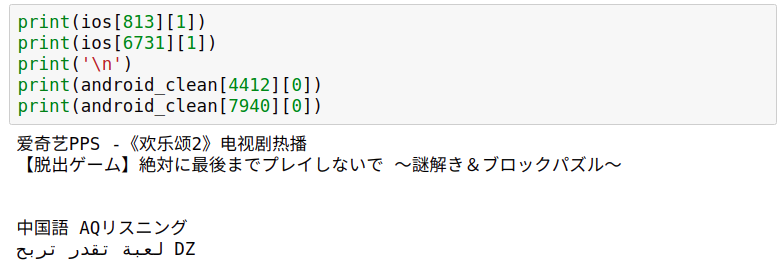

We're not interested in keeping these apps, so we'll remove them. 


One way to do this is to remove each app with a name containing a symbol that isn't commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;), and other symbols (+, *, /).

Each character we use in a string has a corresponding number associated with it. 

For instance, the corresponding number for character **'a'** is **97**, character **'A'** is **65**, and character **'爱'** is **29,233**. 

We can get the corresponding number of each character using the [ord() built-in function](https://docs.python.org/3/library/functions.html#ord).

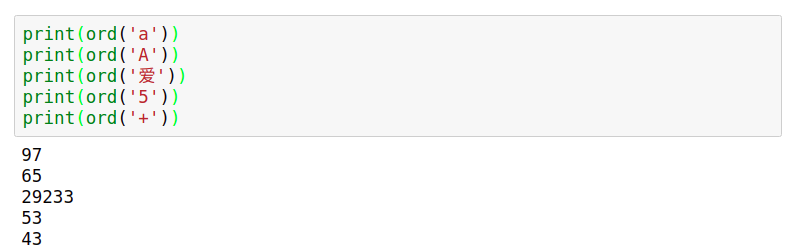

The numbers corresponding to the characters we commonly use in an English text are all in the range **0 to 127**, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) system. 

Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not. 
If the number is equal to or less than 127, then the character belongs to the set of common English characters.

If an app name contains a character that is greater than 127, then it probably means that the app has a non-English name. 

Our app names, however, are stored as strings, so how could we take each individual character of a string and check its corresponding number?

In Python, strings are indexable and iterable, which means we can use indexing to select an individual character, and we can also iterate on the string using a for loop.

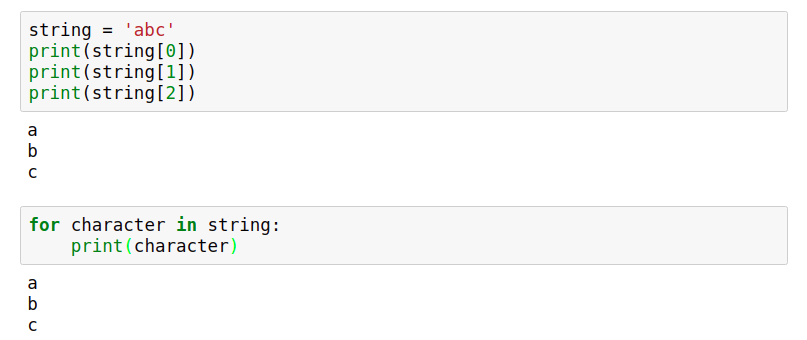


**1. Write a function that takes in a string and returns False if there's any character in the string that doesn't belong to the set of common English characters; otherwise, the function returns True.**

> Inside the function, iterate over the input string. For each iteration check whether the number associated with the character is greater than 127. When a character is greater than 127, the function should immediately **return False** — the app name is probably non-English since it contains a character that doesn't belong to the set of common English characters.

> If the loop finishes running without the **return** statement executing, then it means no character had a corresponding number over 127 — the app name is probably English, so the functions should return **True**.

In [12]:
def is_english(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True


**2. Use your function to check whether these app names are detected as English or non-English:**

* 'Instagram'
* '爱奇艺PPS -《欢乐颂2》电视剧热播'
* 'Docs To Go™ Free Office Suite'
* 'Instachat 😜'

In [13]:
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))


True
False
False
False


we wrote a function that detects non-English app names, but we saw that the function couldn't correctly identify certain English app names like 'Docs To Go™ Free Office Suite' and 'Instachat 😜'. 

This is because emojis and characters like ™ fall outside the ASCII range and have corresponding numbers over 127.

Because of this, we'll remove useful apps if we use the function in its current form.

In [14]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


## Removing Non-English App : Part Two

If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. 

To minimize the impact of data loss, we'll only remove an app if its name has **more than three characters** with corresponding numbers falling outside the ASCII range. 

This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

**Let's edit the function we created on the previous screen, and then use it to filter out the non-English apps.**

1. Change the function you created on the previous screen. If the input string has **more than three characters** that fall outside the **ASCII range (0 - 127)**, then the function should **return False** (identify the string as non-English), otherwise it should **return True**.

In [15]:
def is_english(string):
    non_ascii  = 0
    for character in string:
        if ord(character) > 127:
            non_ascii  += 1
            
    if non_ascii  > 3:
        return False  
    
    return True

2. Use the new function to check whether these app names are detected as English or non-English:

* 'Docs To Go™ Free Office Suite'
* 'Instachat 😜'
* '爱奇艺PPS -《欢乐颂2》电视剧热播'

In [16]:
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

False
True
True


3. Use the new function to filter out non-English apps from both datasets. 

* Loop through each dataset. 
* If an app name is identified as English, append the whole row to a separate list.

In [17]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)

4. Explore the datasets and see how many rows you have remaining for each dataset.

In [18]:
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

We can see that we're left with **9614** Android apps and **6183** iOS apps.

## Isolating the Free Apps

So far in the data cleaning process, we've done the following:

* Removed inaccurate data

* Removed duplicate app entries

* Removed non-English apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. 

Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

Isolating the free apps will be our last step in the data cleaning process.

**1. Loop through each dataset to isolate the free apps in separate lists.**

* Make sure you identify the columns describing the app price correctly.


* Prices come up as strings ('0', $0.99, $2.99, etc.), so make sure you're not checking an integer or a float in your conditional statements.

In [25]:
free_android_apps = []
free_ios_apps = []

# Isolating free Android Apps
for app in android_english:
    price = app[7]
    if price == '0':
        free_android_apps.append(app)

# Isolating free IOS Apps
for app in ios_english:
    price = app[4]
    if price == '0.0':
        free_ios_apps.append(app)

print(len(free_android_apps))
print(len(free_ios_apps))

8864
3222


**2. After you isolate the free apps, check the length of each dataset to see how many apps you have remaining.**

In [23]:
explore_data(free_android_apps, 0, 3, True)
print('\n')
explore_data(free_ios_apps, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8864
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

**We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.**

In [26]:
android_final = free_android_apps
ios_final = free_ios_apps

## Most Common Apps by Genre : Part One

So far, we've spent a good amount of time cleaning data, including the following:

* Removing inaccurate data
* Removing duplicate app entries
* Removing non-English apps
* Isolating the free apps

As we mentioned in the introduction, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.

To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. 

For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

**Let's begin the analysis by determining the most common genres for each market.**

For this, we'll need to build frequency tables for a few columns in our datasets that is, **prime_genre** column of the App Store data set, and the **Genres** AND **Category** columns of the Google Play data set.

## Most Common Apps by Genre : Part Two

we looked at our validation strategy for an app idea, and then we inspected the data sets to identify the columns that might be useful for determining the most common genres in each market. 

Our conclusion was that we'll need to build a frequency table for the **prime_genre** column of the App Store data set, and for the **Genres** and **Category** columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function we can use to display the percentages in a descending order

---
---

**Frequency table that show percentages**

Create a function named **freq_table()** that takes in two inputs: **dataset** (which will be a list of lists) and **index** (which will be an integer).

* The function should return the frequency table (as a dictionary) for any column we want. The frequencies should also be expressed as percentages.
* We already learned how to build frequency tables in the lesson on dictionaries.

In [27]:
def freq_table(dataset, index):
    table = {}
    total = 0
    for row in dataset:
        total += 1
        column = row[index]
        if column in table:
            table[column] += 1
        else:
            table[column] = 1
    
    table_percentage={}
    for key in table:    
        percentage = (table[key]/total) * 100
        table_percentage[key] = percentage
        
    return table_percentage

However, dictionaries don't have order, and it will be very difficult to analyze the frequency tables. 

We'll need to build a second function that can help us display the entries in the frequency table in descending order.

---
---

To do that, we'll need to make use of the built-in [**sorted()** function](https://docs.python.org/3/library/functions.html#sorted). 

This function takes in an iterable data type (like a list, dictionary, tuple, etc.), and returns a list of the elements of that iterable sorted in ascending or descending order (the **reverse** parameter controls whether the order is ascending or descending).

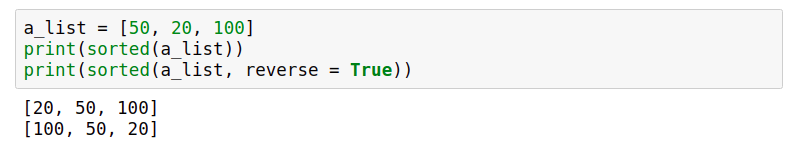

---
---

The **sorted()** function doesn't work too well with dictionaries because it only considers and returns the dictionary keys.

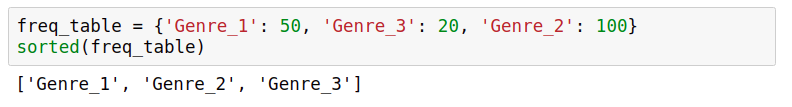

Did you notice that the results of **sorted(freq_table)** were displayed even though we did not specify the **print()** command? 

This is a feature of Jupyter — the output from the last command is displayed by default, without specifying **print()**.

---
---

The **sorted()** function works well if we transform the dictionary into a list of tuples, where each tuple contains a dictionary key along with its corresponding dictionary value. To ensure the sorting works right, the dictionary value comes first, and the dictionary key comes second:

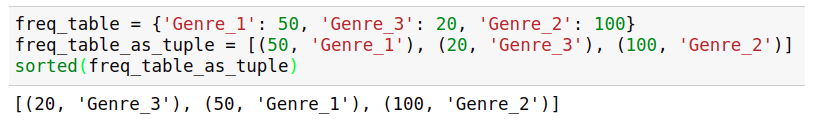

---
---

This is a bit overcomplicated to just sort a dictionary, but there are much simpler ways to do this once we learn more advanced techniques. 

Using the workaround above, we wrote a helper function for you named **display_table()**, which you'll be able to combine with the function you're going to write in the next exercise. 

The **display_table()** function you see below does the following:

* Takes in two parameters: dataset and index. dataset will be a list of lists, and index will be an integer
* Generates a frequency table using the freq_table() function (which you're going to write as an exercise)
* Transforms the frequency table into a list of tuples, then sorts the list in a descending order
* Prints the entries of the frequency table in descending order


In [28]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

## Most Common Apps by Genre : Part Three

**Frequency table of the column prime_genre for IOS**

In [30]:
display_table(ios_final, 11)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than a half **(58.16%) are games**. 

**Entertainment apps** are close to **8%**, followed by **photo and video apps**, which are close to **5%**. 

Only **3.66%** of the apps are designed for **education**, followed by **social networking apps** which amount for **3.29%** of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. 

***However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.***

*Let's continue by examining the **Genres** and **Category** columns of the Google Play data set (two columns which seem to be related).*

**Frequency table of the column Category for Android**

In [33]:
display_table(android_final, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). 

However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

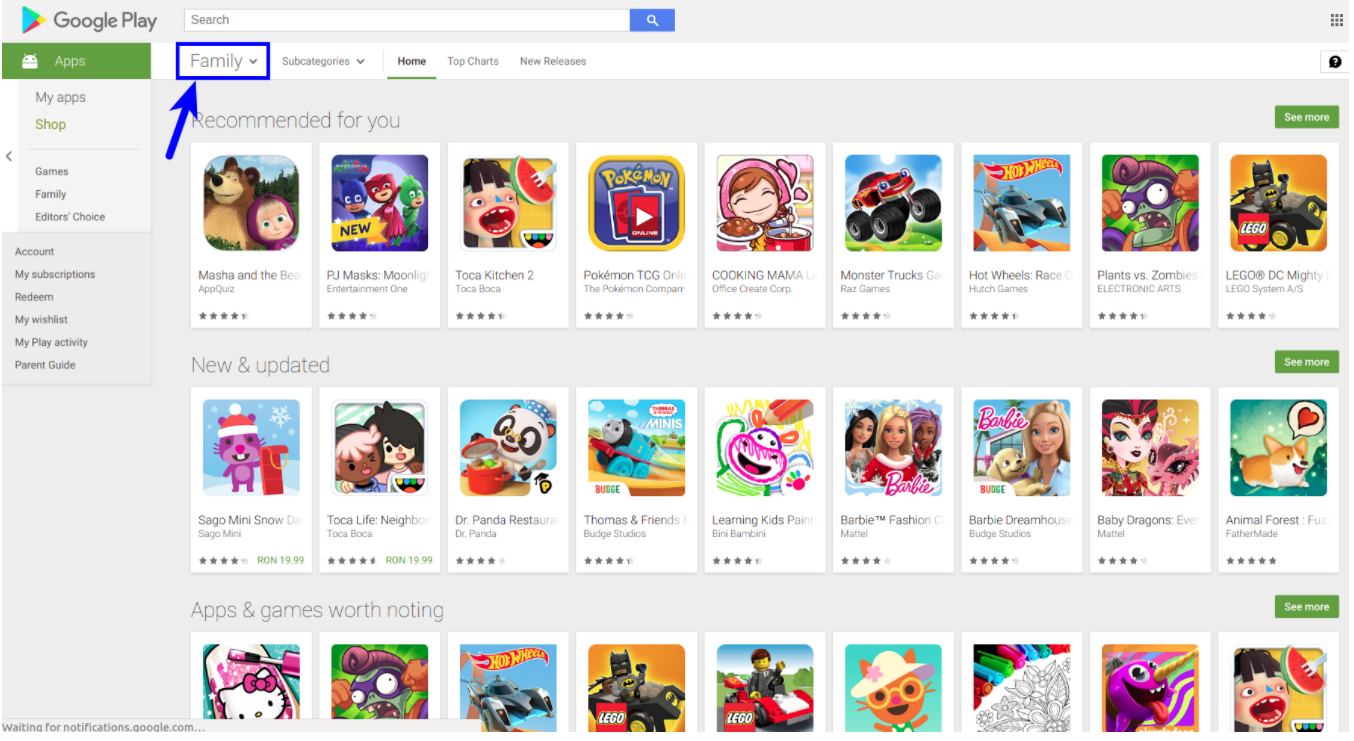

Even so, practical apps seem to have a better representation on Google Play compared to App Store. 

This picture is also confirmed by the frequency table we see for the Genres column:

**Frequency table of the column Genres for Android**

In [34]:
display_table(android_final, 9)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the **Genres** and the **Category** columns is not crystal clear, but one thing we can notice is that the **Genres** column is much more granular (it has more categories). 

We're only looking for the bigger picture at the moment, so we'll only work with the **Category** column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. 

Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

The frequency tables we analyzed above showed us that apps designed for fun dominate the App Store, while Google Play shows a more balanced landscape of both practical and fun apps. Now, we'd like to determine the kind of apps with the most users.

One way to find out what genres are the most popular (have the most users) is to calculate the **average number of installs for each app genre**. 

For the Google Play data set, we can find this information in the **Installs** column, but this information is missing for the App Store data set. 

As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the **rating_count_tot** app.

**Let's start with calculating the average number of user ratings per app genre on the App Store. To do that, we'll need to do the following:** 

* Isolate the apps of each genre
* Add up the user ratings for the apps of that genre
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps)

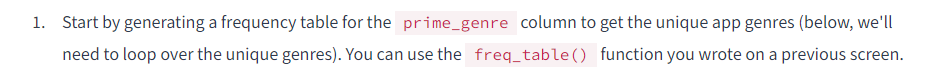

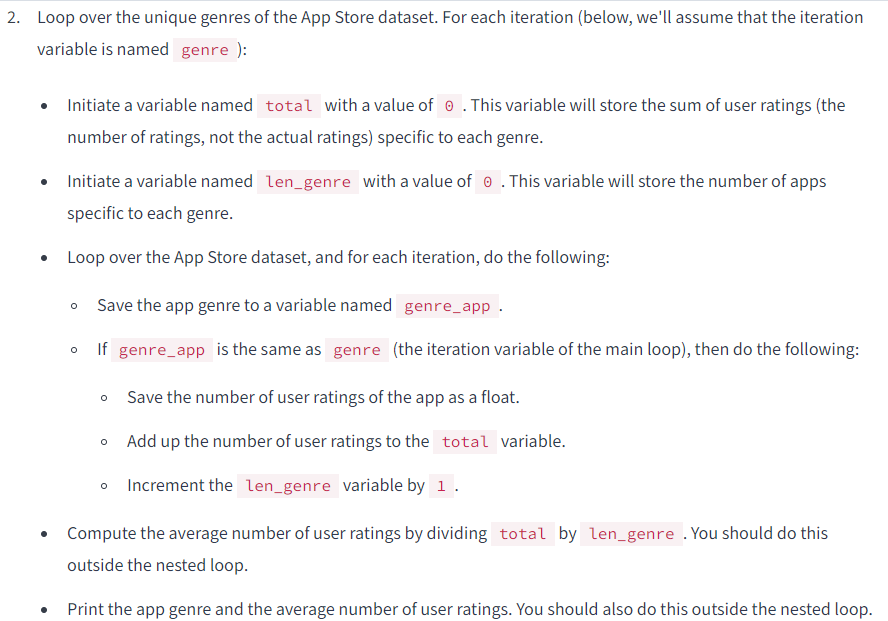

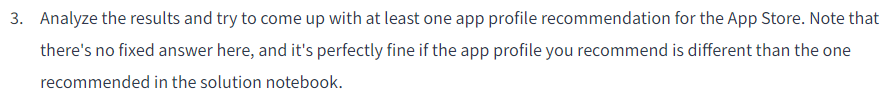

In [47]:
prime_genre_ft = freq_table(ios_final, 11)
for genre in prime_genre_ft:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[11]
        if genre_app == genre:
            rating_count_tot = int(app[5])
            total += rating_count_tot
            len_genre += 1
    avg_usr_rating = total/len_genre
    print(genre + ' :' + str(avg_usr_rating))
    

Social Networking :71548.34905660378
Photo & Video :28441.54375
Games :22788.6696905016
Music :57326.530303030304
Reference :74942.11111111111
Health & Fitness :23298.015384615384
Weather :52279.892857142855
Utilities :18684.456790123455
Travel :28243.8
Shopping :26919.690476190477
News :21248.023255813954
Navigation :86090.33333333333
Lifestyle :16485.764705882353
Entertainment :14029.830708661417
Food & Drink :33333.92307692308
Sports :23008.898550724636
Book :39758.5
Finance :31467.944444444445
Education :7003.983050847458
Productivity :21028.410714285714
Business :7491.117647058823
Catalogs :4004.0
Medical :612.0


* Navigation             :86090.33333333333
* Reference              :74942.11111111111
* Social Networking      :71548.34905660378
* Music                  :57326.530303030304
* Weather                :52279.892857142855

On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [48]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [49]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

* Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

* Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

## Most Popular Apps by Genre on Google Play

we came up with an app profile recommendation for the App Store based on the number of user ratings. 

We have data about the number of installs for the Google Play market, so we should be able to get a clearer picture about genre popularity. 

However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [50]:
display_table(android_final, 5) # Install Column

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


One problem with this data is that is not precise.

For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. 

---

To perform computations, however, we'll need to convert each install number from a string to a float. 

This means we need to remove the commas and the plus characters, or the conversion will fail and cause an error.

To remove characters from strings, we can use the [**str.replace(old, new)** method](https://docs.python.org/3/library/stdtypes.html?#str.replace) (just like **list.append()** or **list.copy()**, **str.replace()** is a special kind of function called method — we'll learn more about this early in the next course). 

**str.replace()** takes in two parameters, **old** and **new**, and replaces all occurrences of **old** within a string with **new**:

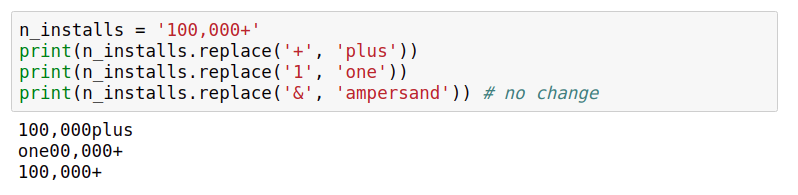

To remove certain characters, we can replace them with the empty string **' '**:

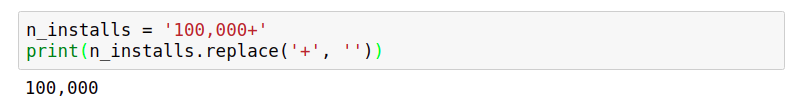

Note that we'll need to reassign to **n_installs** if we want our changes saved:

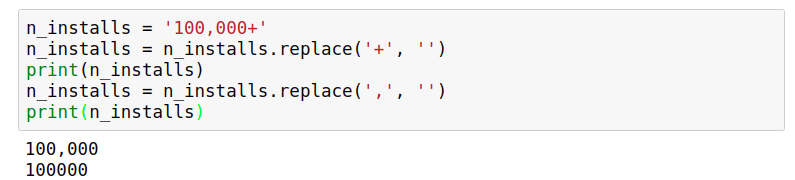

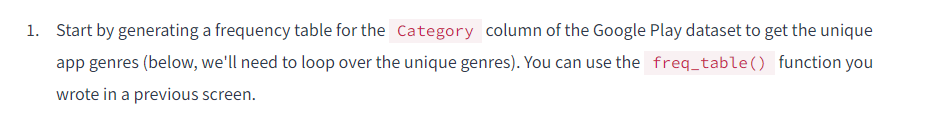

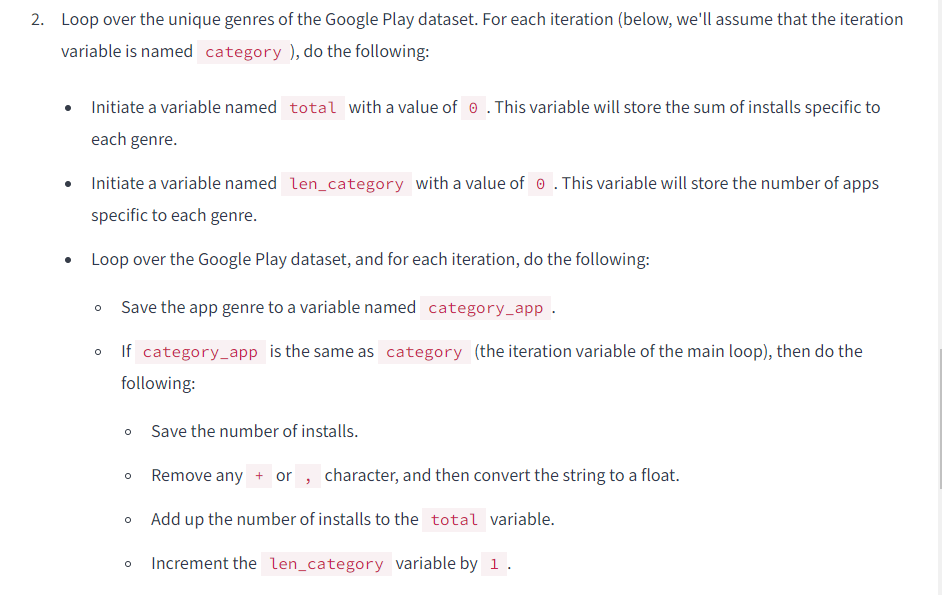

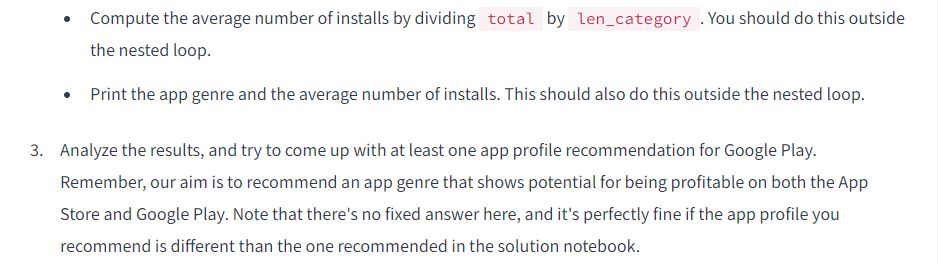

In [51]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [52]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [53]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [54]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [55]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [56]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.